In [145]:

import cv2
from PIL import Image

#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#import mpld3
#mpld3.enable_notebook()

import os,inspect
import sys 

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from grid_distortion import warp_image
from howe import binarize

import random
from torchvision.transforms import RandomAffine
from PIL import Image, ImageOps


def rgb(img):
    b,g,r = cv2.split(img)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

In [2]:
def to_grayscale(img):
    image_reshape = np.swapaxes(img, 0, 2)
    image_reshape = np.swapaxes(image_reshape, 0, 1)
    image_reshape = np.squeeze(image_reshape)
    return(image_reshape)

### Now I will test out other data augmentation techniques with grid distortion

# Here are the results per sample image

Results per additional specific training pages:
- 0          : 0.401499 
- 1          : 0.222225 
- 4           : 0.175470 
- 16         : 0.125458 

Results per test collection:
- 30866      : 0.140689 
- 30882      : 0.253329 
- 30893      : 0.344578 
- 35013      : 0.278403 
- 35015      : 0.163024 

total error: 0.231163 

Also, from looking at these images, I think some sort of profile normalization could really help. 
They are different scales, and I don't think my stretching is really helping. 
Also deslanting or shearing randomly could help. And any other augmenttion Puigcerver did. 
I can estimate profile normalization based on each text. Maybe test side augmentation too.
Well, maybe test side augmentation would be better with expanding and shearing and grid distortion.

From Puigserver:
We perform adequate random distortions on the input images,
in order to artificially augment the training samples
and reduce overfitting. These distortions include: rotation,
translation, scaling and shearing (all performed as a single
affine transform) and gray-scale erosion and dilation. Each of
these operations is applied dynamically and independently on
each image of the training batch (each with 0.5 probability).
Thus, the exact same image is virtually never observed twice
during training.
The parameters controlling each distortion (e.g. rotation
angle, scaling factor, erosion kernel, etc.) are sampled from
a fixed distribution. Tuning each of them to minimize CER,
for each dataset, would be too time consuming. Instead, we
use the default parameters provided by our toolkit which have
worked considerably well on a variety of scenarios3.

The data augmentation is performed as follows. For
each input image, we apply rotation around the images
center with each of the following angles (degrees):
{−5, −3, −1, +1, +3, +5}. In addition, we apply shear using
the following angles {−0.5, −0.3, −0.1, 0.1, 0.3, 0.5}.
This way, 36 additional images are generated per each input
2309
Figure 3. The data augmentation process. Each input image is
transformed using both rotation and shear to generate additional
similar, but different, samples for a given label.
image, dramatically increasing the amount of training data.
This image augmentation process is described in Fig. 3.
This data augmentation technique employed is rather basic.
We conjecture that the system can benefit from an even
more sophisticated data augmentation technique. For example,
elastic distortion [46] can be used

<IPython.core.display.Javascript object>


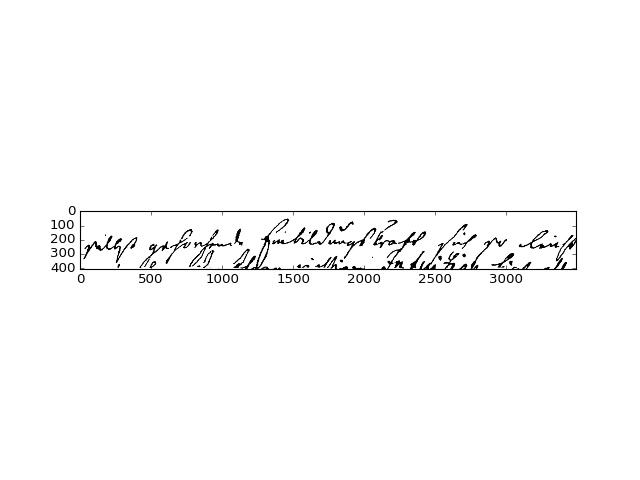

In [246]:
# Choose an image from the easiest and the hardest collection, as well as two images from two general image collections

from torchvision.transforms import RandomAffine

from PIL import Image, ImageOps
#img_f = "/home/ubuntu/datasets/read_ICFHR/specific_data/30893_train/Ricordi/30893_0001_1067572_region_1482135290025_73_line_1482135294228_74.jpg"
#img_f = "/home/ubuntu/datasets/read_ICFHR/specific_data/30866_train/Konzilsprotokolle_C/30866_0011_1063712_r1_line_1459169294609_26.jpg"
img_f = "/home/ubuntu/datasets/read_ICFHR/specific_data_howe/30882_0004_1065839_region_1439904809242_204_line_1439904834897_206_howe.jpg"
img = Image.open(img_f)



_, h = img.size
mesh_i = h / 80.0 * 26
std = h / 80.0 * 1.7
img = Image.fromarray(warp_image(np.array(img), w_mesh_interval=mesh_i, h_mesh_interval=mesh_i, w_mesh_std=std, h_mesh_std=std))

s = random.uniform(1.0 / 3, 3)
w, h = img.size
ar = float(w) / h
new_h = int(round(s * h))
new_w = int(round(ar * new_h))

#t = RandomAffine(7, translate=(0.10, 0.10), scale=(0.5, 1.25), shear=(-60, 60), resample=Image.BILINEAR, fillcolor="white")
t = RandomAffine(5, shear=(-20, 20), resample=Image.BILINEAR, fillcolor="white")
img = img.resize((new_w, new_h), resample=Image.BILINEAR)
img_t = t(img)
plt.imshow(img_t, cmap = "Greys_r")

# Now I am going to make a directory to put all of the howe binarization files in.
I will probably need to figure out how to do this with multiprocessing, but for the time being, this is all I've got

In [64]:
dest_folder = "/deep_data/datasets/read_curtis/Training-howe"
! mkdir $dest_folder

In [54]:
data_folder = "/deep_data/datasets/read_curtis/Training/"
images_dir = os.path.join(data_folder,'Images')
images_files = [os.path.join(images_dir,f) for f in os.listdir(images_dir) if ".jpg" in f.lower()]

In [60]:
print(os.path.basename(images_files[0]))

Seite0066.JPG


In [ ]:
for f in images_files:
    img = cv2.imread(f)
    img_how = binarize(img)
    cv2.imwrite(os.path.join(dest_folder, f.lower().partition(".jpg")[0] + "_howe.jpg"), img_how)

<IPython.core.display.Javascript object>


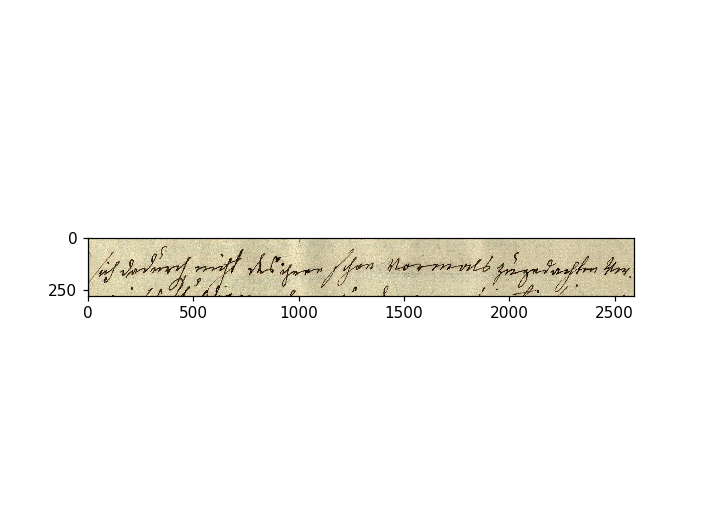

In [12]:
img_file = "/deep_data/datasets/ICFHR_Data/general_data/30865/Konzilsprotokolle_B/30865_0011_1063536_r2_r2l1.jpg"
img_c  = cv2.imread(img_file)
plt.imshow(rgb(img_c))

### Started at 8:28 AM. Ended not long thereafter (maybe 20 seconds)

In [6]:
img_how = binarize(img_c)

In [13]:
plt.imshow(img_how, cmap="Greys_r")

### Now let's try a large picture

<IPython.core.display.Javascript object>


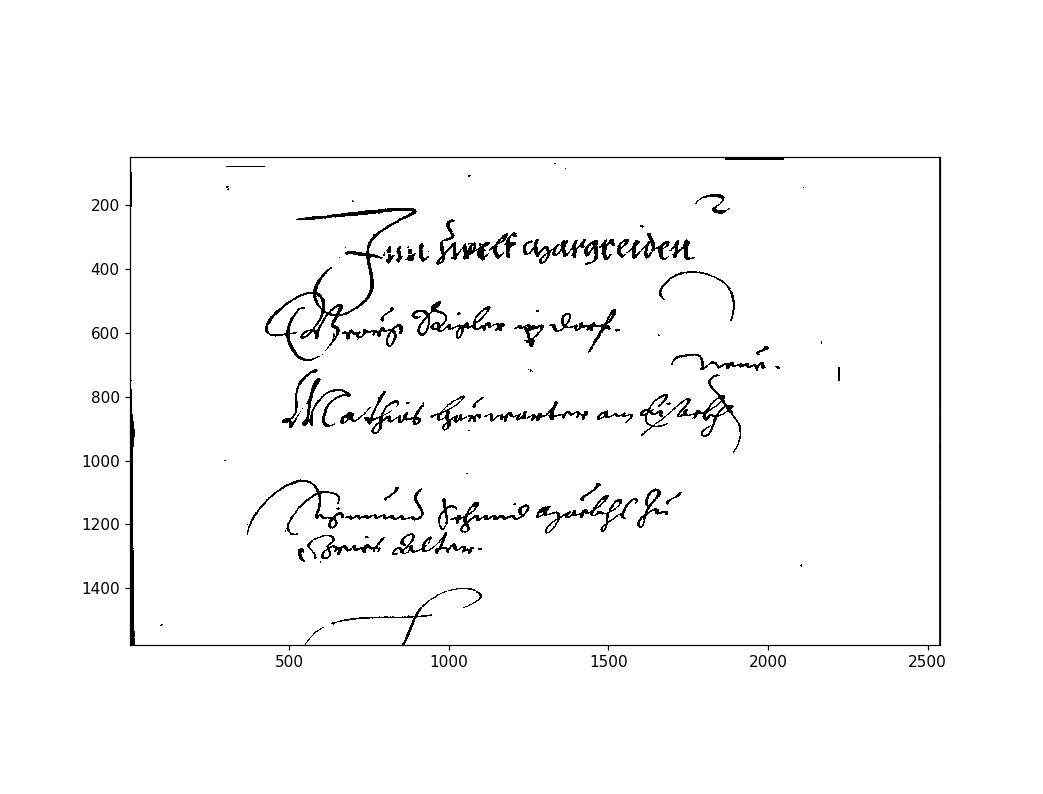

In [23]:
# Image 0003 has a lot of background, so it is a good one to test the binarizer
img_file_read = "/deep_data/datasets/read_curtis/Training/Images/Seite0003.JPG"
img_read = cv2.imread(img_file_read)
plt.imshow(rgb(img_read))

### Started at 8:34 AM for this 3500 h x 2500 w (a little more) picture. It was done no later than 8:41, when I returned from the restroom. Looking at it, it looks very good. I think I just need to multiprocess it and create databases with this binarization as well as the other one they use. 

In [16]:
img_how_read = binarize(img_read)

In [39]:
plt.imshow(rgb(img_read))

In [38]:
plt.imshow(img_how_read, cmap="Greys_r")

In [45]:
cv2.imwrite("test_howe_read.png", img_how_read)

True

In [49]:
saved_img_read = cv2.imread("test_howe_read.png", 0)
print(saved_img_read.shape)

(3548, 2535)


In [44]:
saved_img_read[0, 0, 2]

255

In [40]:
plt.imshow(saved_img_read, cmap="Greys_r")

In [19]:
# The binarizer cuts off the edges a little bit. I can just pad images with whitespace, I think, hopefully it won't make a difference
print(img_c.shape)
print(img_how.shape)
print(img_read.shape)
print(img_how_read.shape)

(276, 2590, 3)
(273, 2587)
(3551, 2538, 3)
(3548, 2535)


In [32]:

#img = warp_image(img)

# This looks beautiful with the present parameters of w_mesh 100, h_mesh 40, w_mesh_std 1, h_mesh_std 1. The standard deviation should probably be more to warp the text more.
img_warped = warp_image(img_c, w_mesh_interval=100, h_mesh_interval=40, w_mesh_std=10, h_mesh_std=4)

In [33]:
plt.imshow(rgb(img_warped))

In [34]:
from PIL import Image, ImageOps

In [51]:
b = np.array(Image.open(img_file).convert('L'))

In [53]:
b.shape

(276, 2590)

In [55]:
plt.imshow(Image.fromarray(warp_image(np.array(Image.open(img_file).convert('L')))))

In [41]:
 l = Image.open(img_file).convert('L')

In [44]:
l.shape()

AttributeError: 'Image' object has no attribute 'shape'

In [ ]:
opencvImage = numpy.array(PILImage)

### Now I am going to demo how I should combine the images. However, I can put them into an lmdb database before then quite easily. I should test out whether creation of lmdb database works with adding these extra images before I work on combining them.

In [1]:
# I say let's just read in the channels, put them in one numpy array, padding edges as necessary. Could even do a for loop to map pixels availabale from howe

In [4]:
# The dimensions should be the same because of the mask!! Plus, I didn't get any errors in making the dataset. A few pixels here or there shouldn't make a difference
img = "/deep_data/datasets/read_curtis/Training/Images/Seite0001.JPG"
img_howe = "/deep_data/datasets/read_curtis/Training-howe/seite0001_howe.jpg"
img_simple = "/deep_data/datasets/read_curtis/Training-imgtxt/seite0001_simplebin.jpg"

In [8]:
image = Image.open(img).convert('L')
howe_img = Image.open(img_howe).convert('L')
bin_img = Image.open(img_simple).convert('L')

In [38]:
img_rgb = Image.open(img).convert("RGB")
print(img_rgb.size)

(2538, 3551)


In [19]:
howe_t_img = Image.new('L', image.size)
howe_t_img.paste(howe_img, howe_img.getbbox())

In [23]:
new_img = Image.merge("RGB", (image, howe_t_img, bin_img))

In [16]:
print(image.size)
print(howe_img.size)
print(bin_img.size)

(2538, 3551)
(2535, 3548)
(2538, 3551)


In [15]:

from PIL import Image

im = Image.open(my_image_file)
a4im = Image.new('RGB',
                 (595, 842),   # A4 at 72dpi
                 (255, 255, 255))  # White
a4im.paste(im, im.getbbox())  # Not centered, top-left corner
a4im.save(outputfile, 'PDF', quality=100)

NameError: name 'my_image_file' is not defined

In [25]:
I, H, B = new_img.split()

### The split channels look exactly the same as the originals with the cmap set (or not set)

<IPython.core.display.Javascript object>


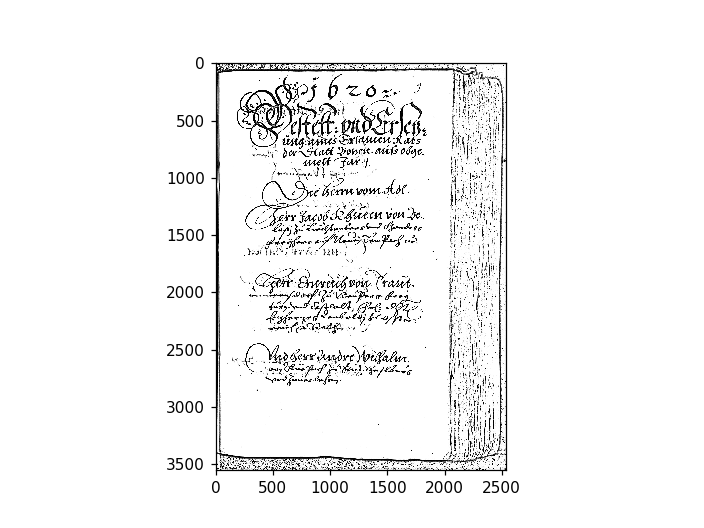

In [32]:
plt.imshow(bin_img) #, cmap="Greys_r")

### Now are the arrays the same

In [34]:
a = np.array(howe_t_img)
b = np.array(H)

In [36]:
b.shape

(3551, 2538)

In [37]:
np.array_equal(a,b)

True

## Eureka! The arrays are equal! Therefore, merging will work,